#### iris 데이터 불러오기

In [1]:
from sklearn.datasets import load_iris
data = load_iris() 

In [2]:
print(data.keys())
print(data.data.shape, data.target.shape)
print(data.target_names, data.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(150, 4) (150,)
['setosa' 'versicolor' 'virginica'] ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data.target     # 섞여 있지 않음 확인 / 학습 전에 섞어야 함 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

[Quiz] DecisionTreeClassifier를 이용하여 iris 데이터 분류모델을 작성하여 test에 대한 score를 계산하자.

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, 
                                                    random_state=42, stratify=data.target)

In [6]:
import numpy as np 
np.unique(y_train, return_counts=True)[1], np.unique(y_test, return_counts=True)[1]
# stratify - > y값 비율 균등 분배 

(array([38, 37, 37], dtype=int64), array([12, 13, 13], dtype=int64))

In [7]:
model = DecisionTreeClassifier(criterion='entropy') # 불순도계산을 엔트로피방법으로 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9736842105263158

[Quiz] sklearn.neighbors.KNeighborsClassifier 를 이용하여 k를 튜닝하자

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors' : range(1, 20, 2)}  # 최근접 이웃 n_neighbors는 홀수만

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, params, n_jobs=-1 )# estimator자리 knn, n_jobs=-1 : 모두 사용
grid.fit(X_train, y_train)
print(grid.best_params_)
grid.score(X_test, y_test)


{'n_neighbors': 11}


0.9736842105263158

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors' : range(1, 20, 2)}  

knn = KNeighborsClassifier(weights='distance')  # 거리가 멀수록 가중치를 부여합니다. ('uniform/distance')
grid = GridSearchCV(knn, params, n_jobs=-1 )
grid.fit(X_train, y_train)
print(grid.best_params_)
grid.score(X_test, y_test)

{'n_neighbors': 7}


0.9473684210526315

In [10]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [11]:
best = {}
best['score'] = 0 # 왜? 
for md in mds:
    for msl in msls:
        for mln in mlns:
            m = DecisionTreeClassifier(criterion='entropy', max_depth=md, 
                                        min_samples_leaf=msl, max_leaf_nodes=mln)
            m.fit(X_train, y_train)
            score = m.score(X_test, y_test)
            print(f'current score is {score} at md={md}, msl={msl}, mnl={mln}')
            if score > best['score']:
pass


IndentationError: expected an indented block (<ipython-input-11-0a1a7ded22a2>, line 12)

In [12]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9210526315789473

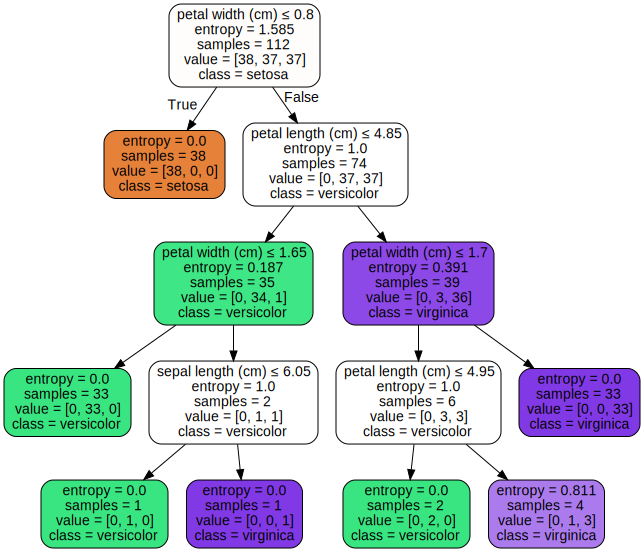

In [13]:
tree = model.tree_
import graphviz
from sklearn.tree import export_graphviz, plot_tree

dot_data = export_graphviz(model, out_file=None, 
                     feature_names=data.feature_names,  
                     class_names=data.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

#### EDA 및 전처리

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

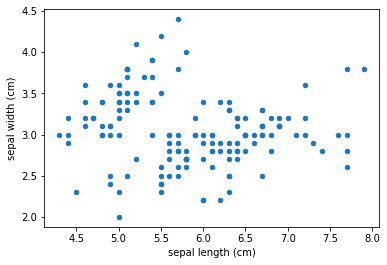

In [16]:
colnames = iris.columns
iris.plot.scatter(colnames[0],colnames[1])

In [17]:
iris.values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
np.unique(data.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [19]:
Species = pd.Series(data.target)
Species.value_counts()

0    50
1    50
2    50
dtype: int64

In [20]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
iris.columns = ['sl', 'sw', 'pl', 'pw']
iris['Species'] = data.target_names[data.target]
iris.head()

,sl,sw,pl,pw,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
iris.isna().sum()

sl         0
sw         0
pl         0
pw         0
Species    0
dtype: int64

- EDA

- 탐색적 데이터 분석 : 데이터 이해하기

In [23]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sl       150 non-null    float64
 1   sw       150 non-null    float64
 2   pl       150 non-null    float64
 3   pw       150 non-null    float64
 4   Species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
iris.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
iris.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [28]:
iris.Species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: Species, dtype: int64

- 시각화 

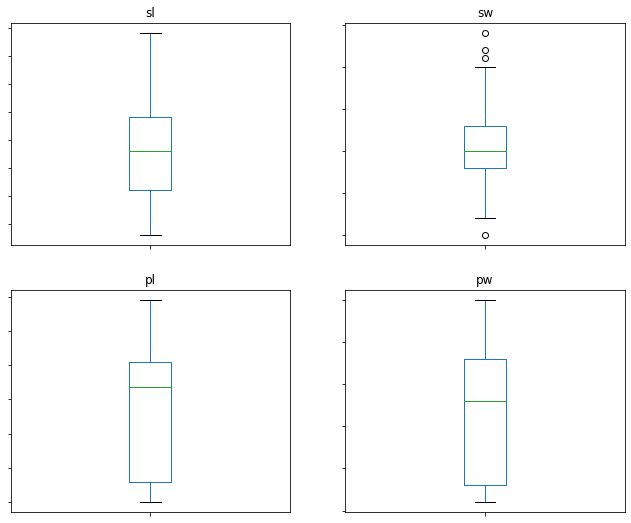

In [30]:
def boxplot_iris(feature_names,dataset):
    i = 1 
    plt.figure(figsize=(11,9))
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis('on')  # off -> 축과 라벨을 없앰 
        plt.tick_params(axis='both', left=True,  top=False, right=False,
                       bottom=True, labelleft=False,labeltop=False, labelright=False, labelbottom=False)
        dataset[col].plot(kind='box', subplots=True, sharex=False,sharey=False)
        plt.title(col)
        i += 1
    plt.show()

boxplot_iris(iris.columns[:-1],iris)


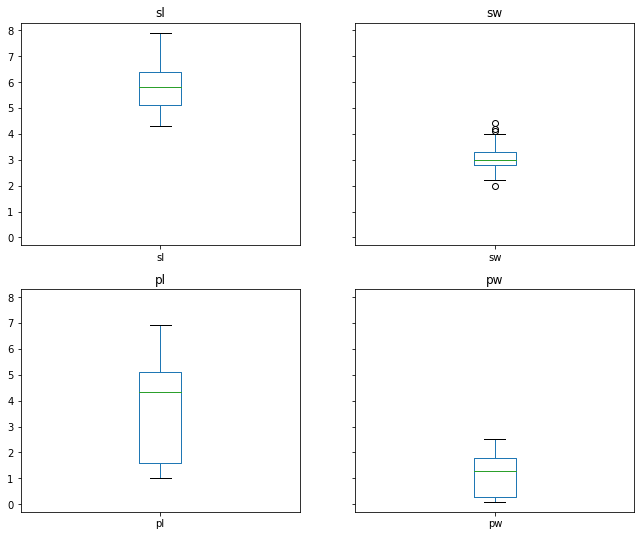

In [32]:
# 위 그래프는 서로 다른 스케일인 게 보이지 X 
# sharey(y를 공유) = True 
fig, axes = plt.subplots(2,2,figsize=(11,9),sharey=True)
axes = axes.ravel()
for i, ax in enumerate(axes):
    iris.iloc[:,i].plot(kind='box', ax=ax)
    ax.set_title(iris.columns[i])
plt.show()
# ravel = reshape(-1)

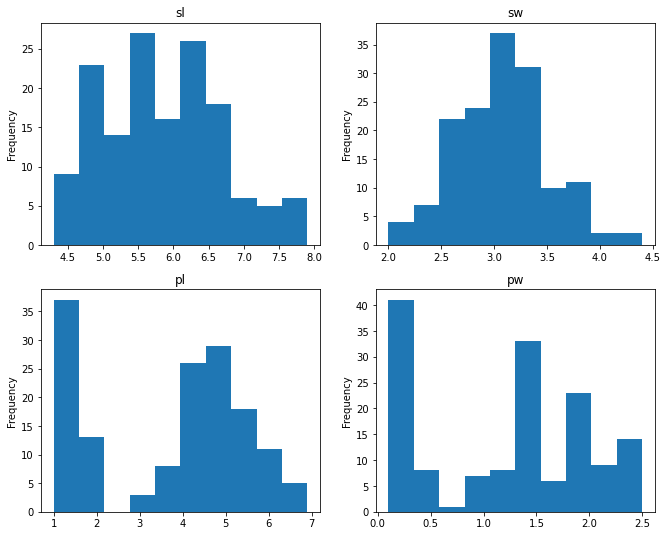

In [36]:
fig, axes = plt.subplots(2,2, figsize=(11, 9), sharey=False)
axes = axes.ravel()
for i, ax in enumerate(axes):
    iris.iloc[:, i].plot(kind='hist', ax=ax)
    ax.set_title(iris.columns[i])
plt.axis('on')
plt.show()

In [39]:
# 상관관계 매트릭스 : df.corr()
# 스스로 대해 항상 1 
corr = iris.corr()
corr

,sl,sw,pl,pw
sl,1.000000,-0.117570,0.871754,0.817941
sw,-0.117570,1.000000,-0.428440,-0.366126
pl,0.871754,-0.428440,1.000000,0.962865
pw,0.817941,-0.366126,0.962865,1.000000


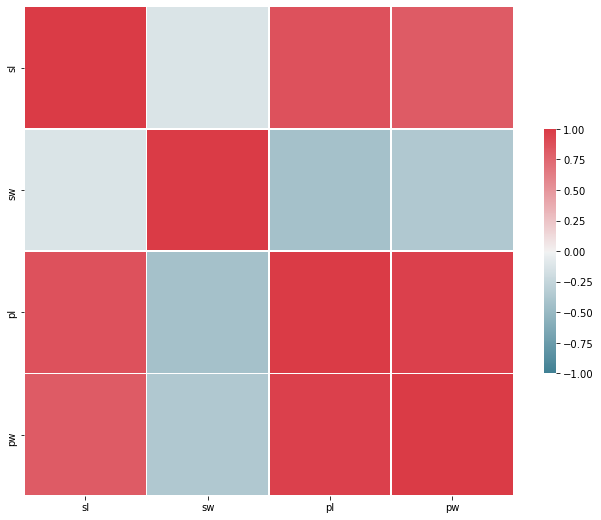

In [42]:
corr = iris.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(11,9))
sns.heatmap(corr, cmap=cmap,vmax=1.0, vmin=-1.0, center=0,
           square=True, linewidths=.5, cbar_kws={'shrink':.5})
plt.show()
# 상관계수의 값은 -1~1사이 이므로 vmax/vmin 값

In [ ]:
# 히트맵 그래프 
# 값이 크면 : 빨간색 , 작으면 : 파란색 
# 값 농도에 따라 색을 달리 함 

In [43]:
corr

,sl,sw,pl,pw
sl,1.000000,-0.117570,0.871754,0.817941
sw,-0.117570,1.000000,-0.428440,-0.366126
pl,0.871754,-0.428440,1.000000,0.962865
pw,0.817941,-0.366126,0.962865,1.000000


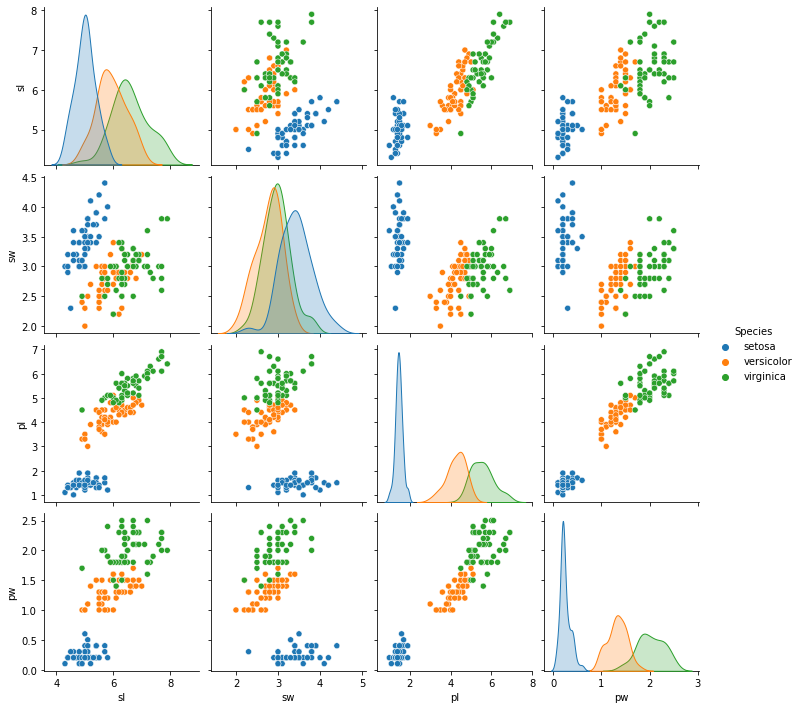

In [44]:
# 관계그래프 <pairplot>  
# 같변수끼리인 대각선 - 히스토그램 <=> 서로 다른 변수 간 - 산점도
sns.pairplot(iris, hue='Species')
plt.show()
# 여기서 어덯게 sw 그닥 필요없는 피쳐라는 결론이 나올까 

<AxesSubplot:ylabel='None'>

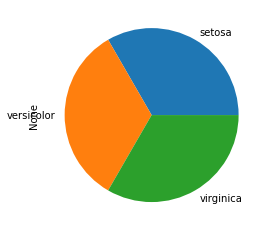

In [45]:
iris.groupby('Species').size().plot(kind='pie')

- data split

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:,:-1], iris.iloc[:,-1], test_size=0.33, random_state=42
)
# 0.33 : 2대 1 비율

- 모델 학습

- base 모델

In [49]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.98

- 모델 일반화를 위한 교차검증 CV 

In [50]:
# KFold 